In [1]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Load and prepare the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [14]:
# Create the model

model = keras.Sequential()
model.add(keras.layers.Input(shape=(28, 28, 1)))

model.add(keras.layers.Conv2D(filters = 6, kernel_size=5, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'))

model.add(keras.layers.Conv2D(filters = 16, kernel_size=5, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='valid'))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=120, activation='relu'))
model.add(keras.layers.Dense(units=84, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [15]:
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, validation_split=0.2)

Epoch 1/20
48/48 [==============================] - 15s 302ms/step - loss: 1.1976 - accuracy: 0.6757 - val_loss: 0.4125 - val_accuracy: 0.8723
Epoch 2/20
48/48 [==============================] - 14s 294ms/step - loss: 0.3410 - accuracy: 0.8963 - val_loss: 0.2383 - val_accuracy: 0.9291
Epoch 3/20
48/48 [==============================] - 15s 308ms/step - loss: 0.2220 - accuracy: 0.9339 - val_loss: 0.1682 - val_accuracy: 0.9489
Epoch 4/20
48/48 [==============================] - 15s 307ms/step - loss: 0.1581 - accuracy: 0.9523 - val_loss: 0.1301 - val_accuracy: 0.9622
Epoch 5/20
48/48 [==============================] - 14s 296ms/step - loss: 0.1274 - accuracy: 0.9605 - val_loss: 0.1071 - val_accuracy: 0.9693
Epoch 6/20
48/48 [==============================] - 12s 253ms/step - loss: 0.1048 - accuracy: 0.9671 - val_loss: 0.1002 - val_accuracy: 0.9702
Epoch 7/20
48/48 [==============================] - 10s 215ms/step - loss: 0.0888 - accuracy: 0.9731 - val_loss: 0.0863 - val_accuracy: 0.9751

[]

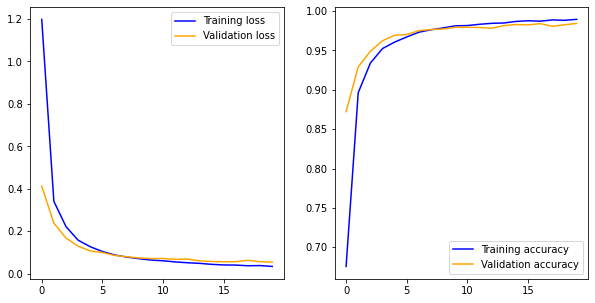

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(history.history['loss'], color='blue', label='Training loss')
ax[0].plot(history.history['val_loss'], color='orange', label='Validation loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], color='blue', label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], color='orange', label='Validation accuracy')
ax[1].legend()

plt.plot()

In [35]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis = 1)

print(confusion_matrix((y_test, axis=1), predictions))

[[ 975    0    0    0    0    0    0    4    1    0]
 [   0 1130    1    0    0    0    1    1    2    0]
 [   2    0 1020    0    1    0    0    6    3    0]
 [   1    1    3  992    0    3    0    7    3    0]
 [   0    0    1    0  978    0    0    0    1    2]
 [   2    0    1    6    0  877    3    1    1    1]
 [   7    2    1    1    2    3  940    0    2    0]
 [   1    2    3    1    1    0    0 1019    1    0]
 [   5    0    3    0    1    1    0    5  959    0]
 [   2    2    0    3   19    1    0   11    5  966]]
